# Manipulation des données

Les données qu'on a pour des analyses sont :
* danceability
* energy
* key
* loudness
* mode
* speechiness
* acousticness
* instrumentalness
* liveness
* valence
* tempo
* duration_ms
* popularity

### Description des différents types d' "Audio-features"


| Audio-features       | Type      | Range        | Description |
|:--------------------:|:---------:|:------------:|:------------|
| __acousticness__     | Float     | [0, 1]       |A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| analysis_url         | String    |              | An HTTP URL to access the full audio analysis of this track. An access token is required to access this data. |
| __danceability__     | Float     | [0, 1]       | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| duration_ms          | Integer   | $\mathbb{N}$ | The duration of the track in milliseconds. |
| __energy__           | Float     | [0, 1]       | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| id                   | String    |              | The Spotify ID for the track. |
| __instrumentalness__ | Float     | [0, 1]       | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| __key__              | Interger  | [0, 1]     | The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. |
| __liveness__         | Float     | [0, 1]       | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| __loudness__         | Float     | [0, 1]       | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
| __mode__             | Integer   | {0, 1}       | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
| __speechiness__      | Float     | [0, 1]       | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.	|
| __tempo__            | Float     | $\mathbb{R}_+$| The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| time_signature       | Integer   | $\mathbb{N}$ | An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). |
| track_href           | String    |              | A link to the Web API endpoint providing full details of the track. |
| type                 | String    |              | The object type: “audio_features” |
| uri                  | String    |              | The Spotify URI for the track.	|
| __valence__          | Float     | [0, 1]       | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).	|

Les audio-features sont calculées grâce à un algorithme/cyborg nommé __Truffle Pig__ de chez __Echo Nest__ racheté par Spotify, qui a pour but d'améliorer drastiquement la recommandation personnalisée des musiques sur Spotify, notamment par le système de playlists.  
La stratégie économique de Spotify repose sur le temps d'écoute en continu sur l'application : plus l'on passe de temps sur Spotify, plus l'on a de chance de s'abonner à Spotify Premium (là où ils font leurs bénéfices).

Truffle Pig repose surtout sur du machine-learning.

On peut les classer en 2 catégories : paramètres objectifs et subjectifs. (en italique, les paramètres utilisables commme critères de préférence pour un utilisateur)

| Objectifs | Subjectifs   |
| :-------: | :----------: |
| Key       | _Danceability_ |
| Loudness  | _Energy_       |
| Mode      | _Valence_      |
| _Speechiness_ | |
| _Acousticness_ | |
| _Instrumentalness_ | |
| _Liveness_ ||
| Tempo | |

Idées :
- établir des fonctions/intervalles que l'on décrit par des mots (par exemple : _speechiness_ entre 0.33 et 0.66 signifie que le morceau contient de la musique "normale" et des paroles parlées)
- faire des moyennes et des variances et classer en plusieurs catégories
- avoir des intervalles types pour chaque genre de musique, afin d'identifier le genre d'un morceau
- utiliser ces genres pour présenter à l'utilisateur des statistiques sur ses goûts musicaux et lui recommander des musiques dans le même style
- créer un générateur de playlist à partir de quelques paramètres (mood, live, dance, genre)

In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
# table = pd.read_json('user_top_tracks_medium_term.json')
# table = json.load(open('user_top_tracks_medium_term.json'))
data = pd.read_csv('user_top_tracks_medium_term_audio-features.csv').set_index('Unnamed: 0')

In [4]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_id
Unnamed: 0,,,,,,,,,,,,,,,,,,,
0,0.792,0.518,10,-9.630,0,0.0491,0.3480,0.000018,0.1030,0.526,100.004,audio_features,4P89bNZVTCmu3zT0IBNLS8,spotify:track:4P89bNZVTCmu3zT0IBNLS8,https://api.spotify.com/v1/tracks/4P89bNZVTCmu...,https://api.spotify.com/v1/audio-analysis/4P89...,215240,4,4P89bNZVTCmu3zT0IBNLS8
1,0.747,0.494,3,-7.957,0,0.1410,0.3930,0.000000,0.0982,0.624,76.006,audio_features,2Ee9amLUslOwgoJWZEpSSD,spotify:track:2Ee9amLUslOwgoJWZEpSSD,https://api.spotify.com/v1/tracks/2Ee9amLUslOw...,https://api.spotify.com/v1/audio-analysis/2Ee9...,228453,4,2Ee9amLUslOwgoJWZEpSSD
2,0.649,0.618,9,-7.691,1,0.0779,0.0215,0.000001,0.0911,0.381,92.020,audio_features,1p9dxTMtG4gZpLp7yzvT54,spotify:track:1p9dxTMtG4gZpLp7yzvT54,https://api.spotify.com/v1/tracks/1p9dxTMtG4gZ...,https://api.spotify.com/v1/audio-analysis/1p9d...,192613,4,1p9dxTMtG4gZpLp7yzvT54
3,0.399,0.491,6,-10.778,0,0.0538,0.0563,0.000890,0.1100,0.151,91.066,audio_features,6AGOKlMZWLCaEJGnaROtF9,spotify:track:6AGOKlMZWLCaEJGnaROtF9,https://api.spotify.com/v1/tracks/6AGOKlMZWLCa...,https://api.spotify.com/v1/audio-analysis/6AGO...,210463,4,6AGOKlMZWLCaEJGnaROtF9
4,0.718,0.712,11,-4.366,1,0.1740,0.5120,0.001210,0.1040,0.531,180.034,audio_features,7x4ASXYEKfQBCewcZhK776,spotify:track:7x4ASXYEKfQBCewcZhK776,https://api.spotify.com/v1/tracks/7x4ASXYEKfQB...,https://api.spotify.com/v1/audio-analysis/7x4A...,189653,4,7x4ASXYEKfQBCewcZhK776


Text(0, 0.5, 'Valence')

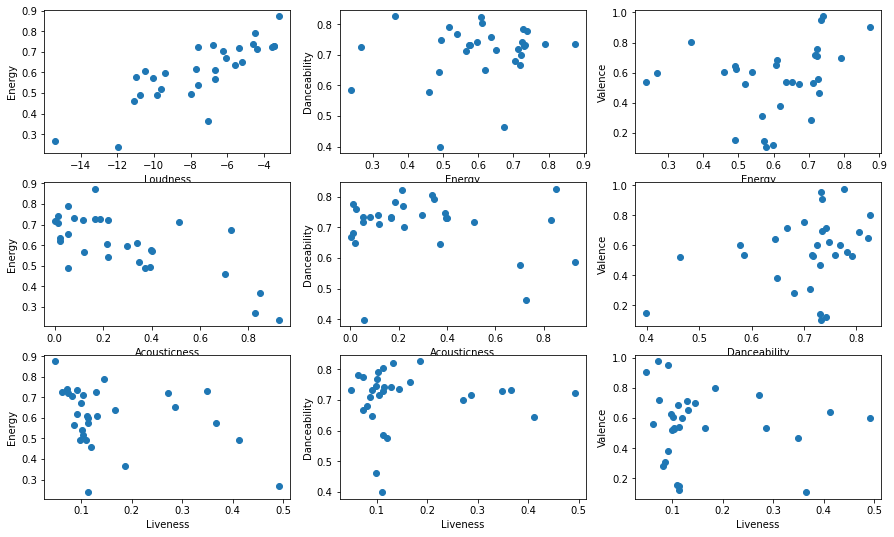

In [5]:
fig, ax = plt.subplots(3,3, figsize=(15,9))

# Energy

ax[0,0].scatter(data['loudness'], data['energy'])
ax[0,0].set_xlabel('Loudness')
ax[0,0].set_ylabel('Energy')

ax[1,0].scatter(data['acousticness'], data['energy'])
ax[1,0].set_xlabel('Acousticness')
ax[1,0].set_ylabel('Energy')

ax[2,0].scatter(data['liveness'], data['energy'])
ax[2,0].set_xlabel('Liveness')
ax[2,0].set_ylabel('Energy')

# Danceability

ax[0,1].scatter(data['energy'], data['danceability'])
ax[0,1].set_xlabel("Energy")
ax[0,1].set_ylabel("Danceability")

ax[1,1].scatter(data['acousticness'], data['danceability'])
ax[1,1].set_xlabel('Acousticness')
ax[1,1].set_ylabel('Danceability')

ax[2,1].scatter(data['liveness'], data['danceability'])
ax[2,1].set_xlabel('Liveness')
ax[2,1].set_ylabel('Danceability')

# Valence

ax[0,2].scatter(data['energy'], data['valence'])
ax[0,2].set_xlabel('Energy')
ax[0,2].set_ylabel('Valence')

ax[1,2].scatter(data['danceability'], data['valence'])
ax[1,2].set_xlabel('Danceability')
ax[1,2].set_ylabel('Valence')

ax[2,2].scatter(data['liveness'], data['valence'])
ax[2,2].set_xlabel('Liveness')
ax[2,2].set_ylabel('Valence')

In [6]:
for param in data.columns:
    if param == 'key' : continue
    print(param, " : ", round(np.mean(data[param]), 2))
    if param == 'tempo' : break

danceability  :  0.71
energy  :  0.6
loudness  :  -7.44
mode  :  0.4
speechiness  :  0.1
acousticness  :  0.29
instrumentalness  :  0.08
liveness  :  0.16
valence  :  0.55
tempo  :  117.71


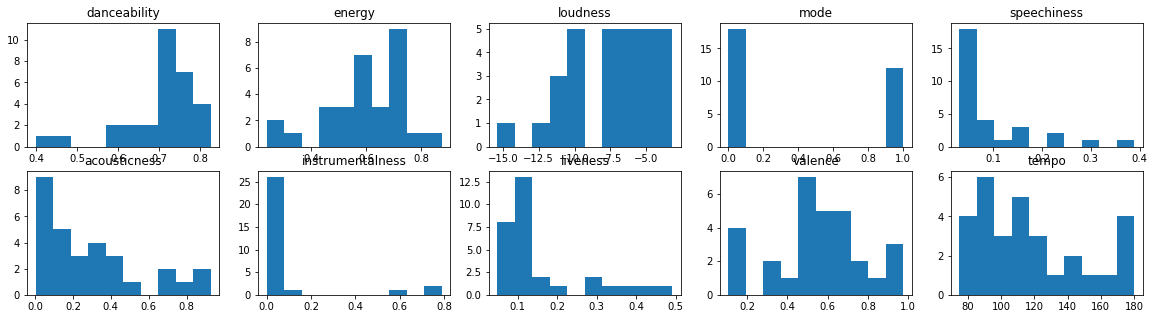

In [7]:
fig, ax = plt.subplots(2,5, figsize=(20,5))
i=0

for param in data.columns:
    if param == 'key' : continue
    ax[i//5, i%5].hist(data[param])
    ax[i//5, i%5].set_title(param)
    i += 1
    if param == 'tempo' : break

### Analyses à implémenter
- valence
- energie
- speechiness
- tempo
- danceability
- liveness (?)
- acousticness (?)

In [14]:
def analyse_valence(values):
    mean = np.mean(values)
    if mean <= 1/3:
        return round(mean,2), "Sombre"
    elif mean <= 0.5:
        return rount(mean,2), "Plutôt sombre"
    elif mean >= 2/3:
        return round(mean,2), "Léger"
    else:
        return round(mean,2), "Plutôt léger"

Analyse de valence de la playlist : 
	Moyenne =  0.55 
	Apprécition :  Plutôt léger 
	Répartition :


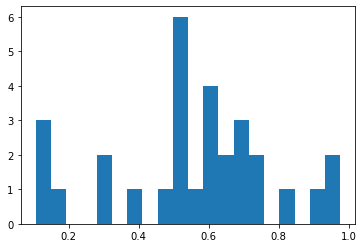

In [15]:
moy, tag = analyse_valence(data['valence'])
print("Analyse de valence de la playlist : \n\tMoyenne = ", moy, "\n\tApprécition : ", tag, "\n\tRépartition :")
plt.hist(data['valence'], bins=20)
plt.show()